# Projeto Estatística - 3º estágio

## 1 - Definição do problema e Coleta de dados

#### Informações Iniciais
- Análise estatística do banco de dados *'pinguins.csv'* com o intuito de compreender e praticar os ensinamentos vistos em sala sobre Regressão Linear
- O banco de dados foi extraido do pacote 'dados' do R, seguindo as instruções da professora
- Variável Resposta = **comprimento_nadadeira**

#### Problema
- **Prever o tamanho da nadadeira de um pinguim com base em outras caractéristicas presentes nos dados usando Regressão Linear**

#### Coleta de dados e Importação de pacotes

In [5]:
#manipulação dos dados
import pandas as pd

#visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

#divisão da base de dados entre treino e teste
from sklearn.model_selection import train_test_split

#modelos de regressao linear
import statsmodels.api as sm

#avaliação e perfomance do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
#carregando a base de dados
dados = pd.read_csv('pinguins.csv', sep=';')

In [7]:
type(dados)

pandas.core.frame.DataFrame

Os dados foram carregados em um objeto do tipo pandas DataFrame, que é equivalente a uma tabela onde podemos ver todas as variáveis do banco de dados

## 2 - Exploração e Pré-processamento dos dados

In [8]:
dados.shape

(344, 8)

Usando o atributo *'shape'* temos um esboço inicial do que temos pela frente, uma "tabela" com 344 linhas e 8 colunas (variáveis)

In [9]:
dados.columns

Index(['especie', 'ilha', 'comprimento_bico', 'profundidade_bico',
       'comprimento_nadadeira', 'massa_corporal', 'sexo', 'ano'],
      dtype='object')

Com o atributo *'columns'* vemos todas as variáveis que estão presentes no banco de dados

- *especie*: variavel qualitativa nominal que descreve a especie do pinguim
- *ilha*: variavel qualitativa nominal que descreve a ilha em que foi localizado o pinguim
- *comprimento_bico*: variavel quantitiva discreta que mede o comprimento do bico do pinguim em milimetros
- *profundidade_bico*: variavel quantitiva discreta que mede a expessura do bico do pinguim em milimetros
- *comprimento_nadadeira*: variavel quantitativa discreta que mede o tamanho da nadadeira do pinguim em milimetros
- *massa_corporal*: varaivel quantitativa discreta que mede o peso corporal do pinguim em gramas
- *sexo: variavel*: qualitativa nominal que descreve o sexo do pinguim
- *ano*: variavel qualitativa que mostra o ano do estudo

Usaremos o metodo *'head()'* para visualizar as 5 primeiras linhas do df (DataFrame) com o intuito de termos uma ideia de como os dados estão dispostos

In [10]:
dados.head()

,especie,ilha,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,sexo,ano
1,Pinguim-de-adélia,Torgersen,"39,1","18,7",181.0,3750.0,macho,2007
2,Pinguim-de-adélia,Torgersen,"39,5","17,4",186.0,3800.0,fêmea,2007
3,Pinguim-de-adélia,Torgersen,"40,3",18,195.0,3250.0,fêmea,2007
4,Pinguim-de-adélia,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Pinguim-de-adélia,Torgersen,"36,7","19,3",193.0,3450.0,fêmea,2007


Já na linha 4 podemos ver que existem valores faltantes.  
Quase sempre nossos bancos de dados irão vir com dados faltando ou algum outro tipo de erro. Cabe ao analista de dados tratar esses erros para prosseguir com um df completo

Usamos o método *'info()'* para visualizar o tipo de cada variável e analisar se condiz com o tipo que é especificado na descrição do problema e tambem analisar se existem valores faltantes

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   especie                344 non-null    object 
 1   ilha                   344 non-null    object 
 2   comprimento_bico       342 non-null    object 
 3   profundidade_bico      342 non-null    object 
 4   comprimento_nadadeira  342 non-null    float64
 5   massa_corporal         342 non-null    float64
 6   sexo                   333 non-null    object 
 7   ano                    344 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 24.2+ KB


Nesse caso podemos concluir que:  
- As colunas *'comprimento_bico'*, *'profundidade_bico'* que são valores numéricos estão em um tipo *'object'* que quase sempre é associado a strings, portanto precisamos tratar isso.
- Sabendo que o df tem 344 linhas, algumas colunas não possuem todos esses valores como podemos ver na coluna *'Non-Null Count'*

In [12]:
dados['comprimento_bico'] = pd.to_numeric(dados['comprimento_bico'].str.replace(',','.'))
dados['profundidade_bico'] = pd.to_numeric(dados['profundidade_bico'].str.replace(',','.'))

transformando as colunas string em valores numéricos, e trocando o ',' pela '.' pois a sintaxe python aceita apenas o '.' como separador de digitos

In [13]:
dados.dropna(axis=0, inplace=True)

Utilizando o metodo *'dropna()'* passando os parametros '0' e 'True' para remover todas as linhas com dados faltantes
- *'axis=0'* determina o eixo que deve ser apagado, nesse caso apagamos as linhas
- *'inplace=True'* salva as alterações no proprio dataframe sem precisarmos criar outro

Agora conferindo se todos os erros foram tratados:

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 344
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   especie                333 non-null    object 
 1   ilha                   333 non-null    object 
 2   comprimento_bico       333 non-null    float64
 3   profundidade_bico      333 non-null    float64
 4   comprimento_nadadeira  333 non-null    float64
 5   massa_corporal         333 non-null    float64
 6   sexo                   333 non-null    object 
 7   ano                    333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


Podemos ver que todas as variáveis não possuem mais valores não nulos e as quantitavas estão com tipo adequado

Agora com os dados tratados nosso df tem 333 linhas das 344 iniciais.  
Sendo assim o **tamanho da amostra é de 333**

Agora que terminamos a parte de tratamento vamos nos aprofundar nos dados coletados.  
Primeiramente vamos ver o resumo estatístico das variaveis quantitativas usando o método 'describe()'

In [15]:
dados.describe()

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,ano
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Esse método nos retorna informações importantes como: contagem de ocorrencias, média, desvio padrão, valores mínimos e máximos e os quartís.  
Podemos observar que os dados coletados não possuem nenhuma anomalia quanto a distribuição

Agora partindo para a visualização inicial dos dados, usaremos o método *'pairplot()'* para criar uma matriz de gráficos de dispersão e histogramas das variáveis coletadas.

A partir da matriz gerada, podemos analisar que:
- Os gráficos gerados na diagonal principal são o histograma de cada variável.
- Os graficos fora da diagonal principal são diagramas de dispersão entre pares de variaveis. Eles ajudam a visualizar se há alguma correlação ou padrão entre variáveis especificas.

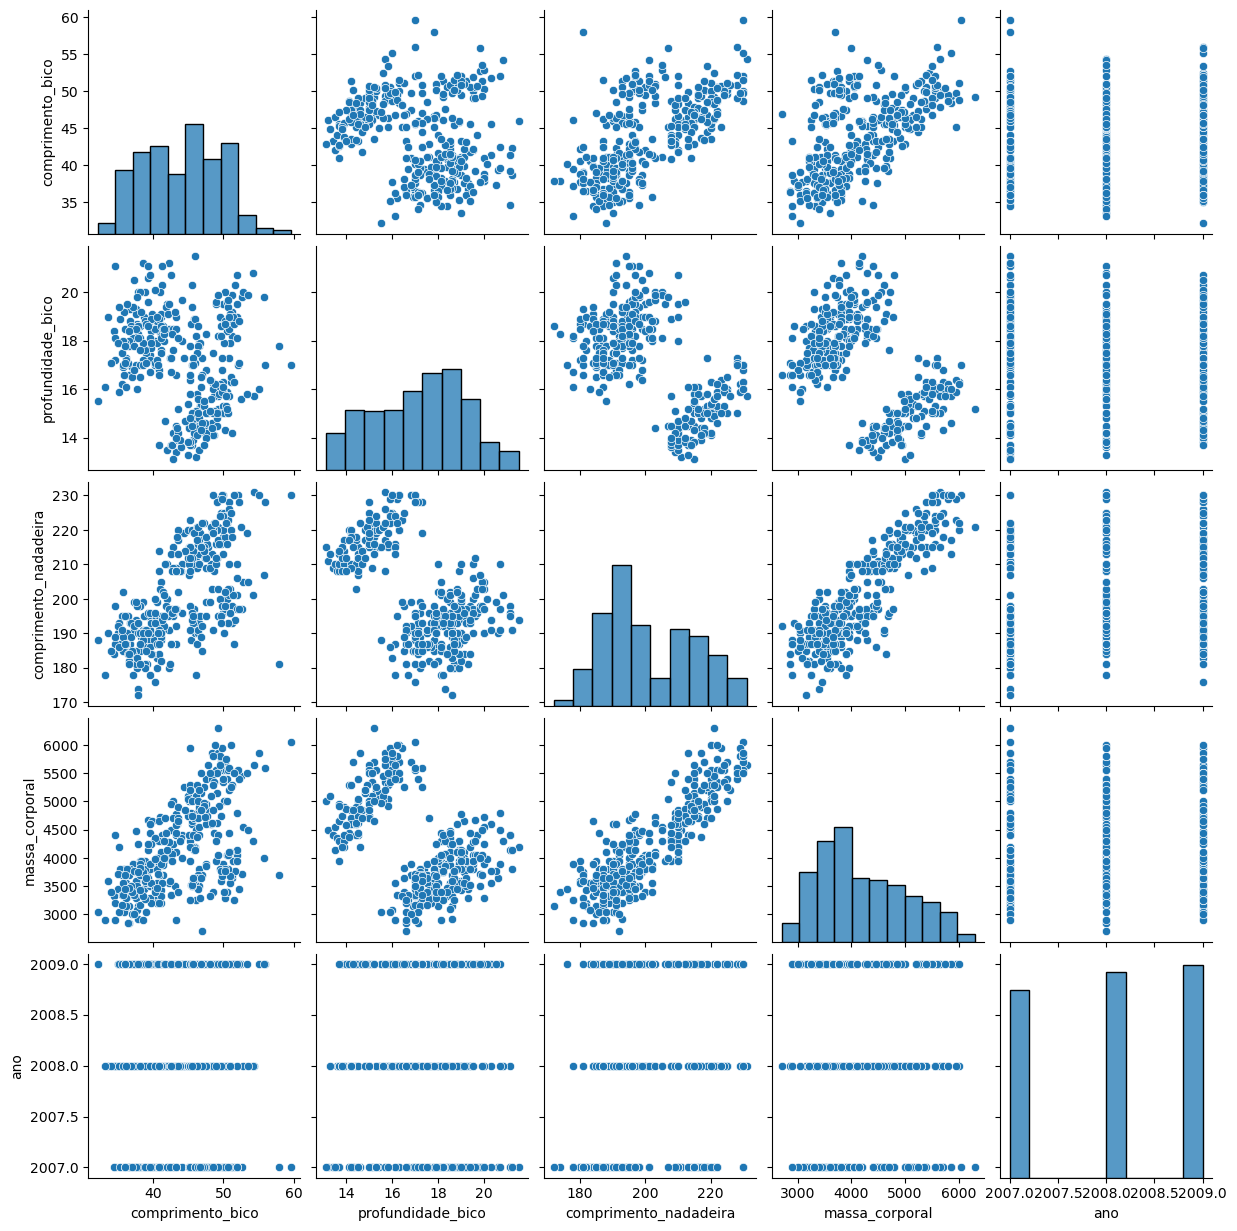

In [16]:
sns.pairplot(dados)

Após analisar os gráficos acima podemos concluir que:
- A variável ano por ser apenas um dado sobre a coleta, ela provavelmente não tem relação com as demais.
- O gráfico entre *'massa_corporal'* e *'comprimento_nadadeira'* indica uma correlação positiva moderada, a qual podemos ter certeza mais a frente.

Baseado nas informações extraidas acima vamos remover a variável ano do df

In [17]:
dados.drop('ano', axis=1, inplace=True)

Para analisarmos as varáveis catégoricas usaremos o *'boxplot()'*

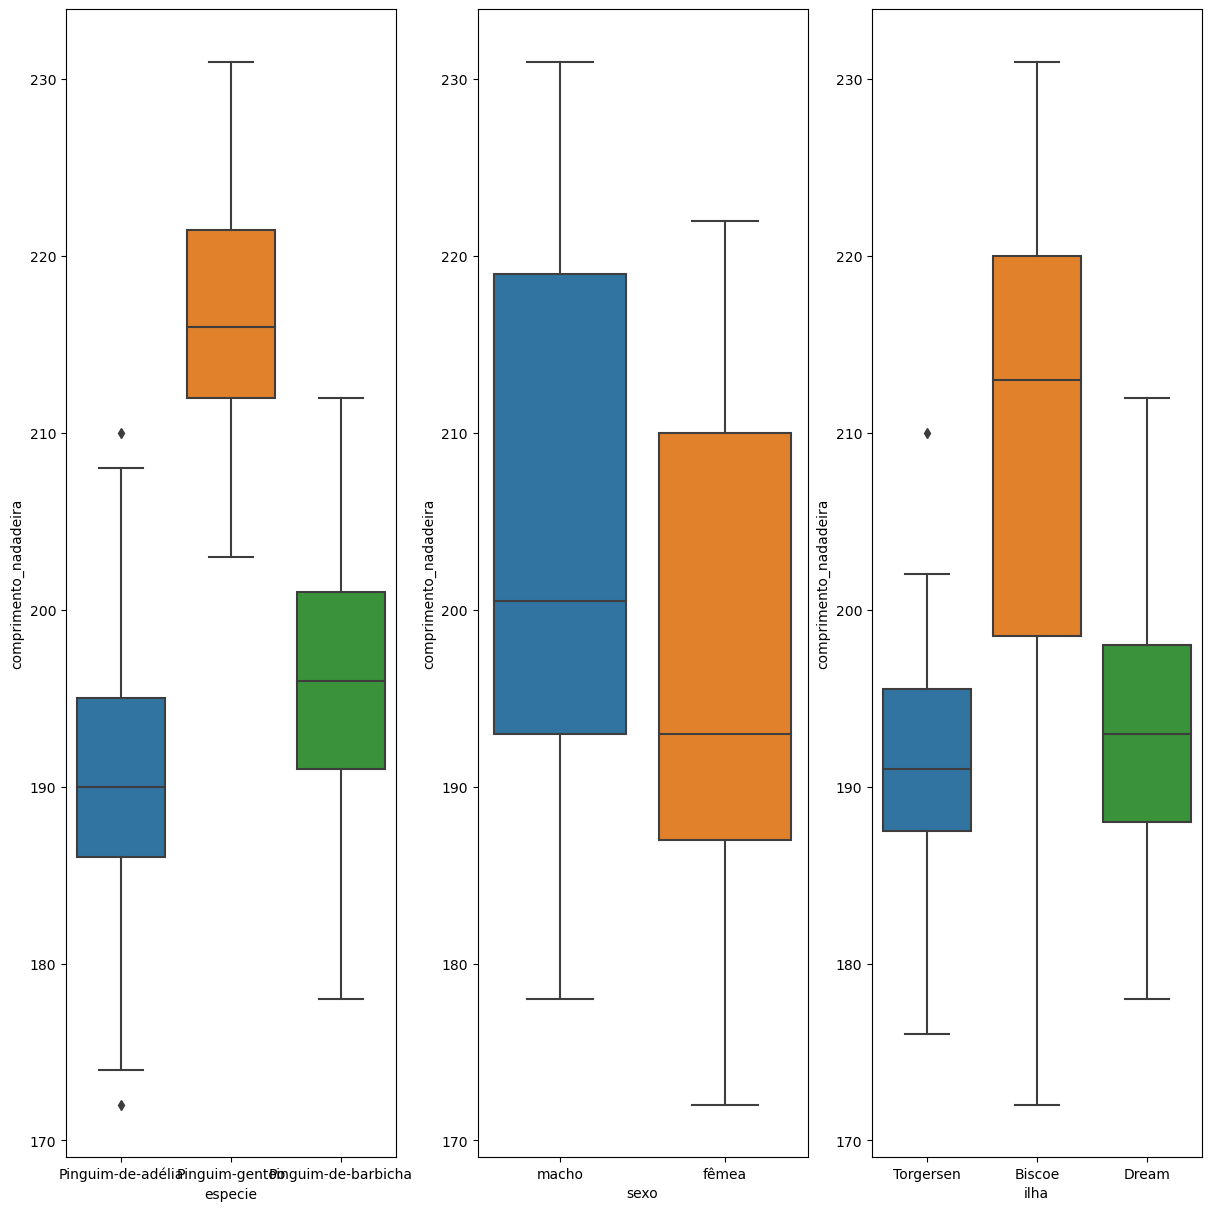

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 12), constrained_layout=True)
sns.boxplot(x='especie', y='comprimento_nadadeira', data=dados, orient='v', ax=axs[0])
sns.boxplot(x='sexo', y='comprimento_nadadeira', data=dados, orient='v', ax=axs[1])
sns.boxplot(x='ilha', y='comprimento_nadadeira', data=dados, orient='v', ax=axs[2])
plt.show()



Baseado nos gráficos acimas podemos deduzir que:
- Os pinguins da espécie gentoo possuem um *'comprimento_nadadeira'* maior comparado as outras duas espécies.
- Os pinguins da ilha Biscoe possuem um *'comprimento_nadadeira'* maior comparado aos pinguins encontrados nas outras ilhas.
- O sexo do pinguim não tem tanta influencia sobre o *'comprimento_nadadeira'*

Continuando nossa analise sobre as variáveis categoricas.

In [19]:
sns.countplot(x='ilha', hue='especie', data=dados)

<AxesSubplot:xlabel='ilha', ylabel='count'>

Analisando a ocorrencia de espécies de pinguins por ilha, podemos concluir que:
- O fato da espécie gentoo ter maior tamanho de nadadeira juntamente com os pinguins da ilha Biscoe é justificado pois é a unica ilha em que os gentoo são encontrados.
- Podemos conluir que a espécie gentoo tem uma possivel correlação com variavel resposta.

Sendo assim, vamos retirar as variáveis categoricas *'ilha'* e *'sexo'* pois ambas não contribuem para o nosso estudo

In [20]:
dados.drop(['sexo', 'ilha'], axis=1, inplace=True)

Agora vamos verificar como está nosso df no estado atual

In [21]:
dados.head()

,especie,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal
1,Pinguim-de-adélia,39.1,18.7,181.0,3750.0
2,Pinguim-de-adélia,39.5,17.4,186.0,3800.0
3,Pinguim-de-adélia,40.3,18.0,195.0,3250.0
5,Pinguim-de-adélia,36.7,19.3,193.0,3450.0
6,Pinguim-de-adélia,39.3,20.6,190.0,3650.0


Sendo o banco de dados constituido apenas por variáveis que possivelmente possuem uma correlação com a variavel resposta, podemos prosseguir com a análise.

Tendo em vista que nosso df tem variáveis com valores na escala de milhares (*'massa_corporal'*) e valores na escala de dezenas (*'profundidade_bico'*) vamos converter a *'massa_corporal'* para kg para diminuir a diferença entre escalas.

In [22]:
dados['massa_corporal'] = dados['massa_corporal'] / 1000

In [23]:
dados.head()

,especie,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal
1,Pinguim-de-adélia,39.1,18.7,181.0,3.75
2,Pinguim-de-adélia,39.5,17.4,186.0,3.80
3,Pinguim-de-adélia,40.3,18.0,195.0,3.25
5,Pinguim-de-adélia,36.7,19.3,193.0,3.45
6,Pinguim-de-adélia,39.3,20.6,190.0,3.65


Agora com os dados em uma escala próxima, vamos precisar codificar as variáveis categoricas criando variaveis dummy para incluir-las no modelo.  

Variáveis dummy são utilizadas em análises estatísticas para representar categorias ou grupos de dados como valores 0 ou 1, indicando a presença ou ausência de uma característica. Elas são frequentemente empregadas em regressões e modelos preditivos para capturar efeitos de variáveis categóricas no resultado do modelo.

In [24]:
dados_encoded = pd.get_dummies(dados, columns=['especie'])

Usando 'head()' para ver nosso df no estado atual.

In [25]:
dados_encoded.head()

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo
1,39.1,18.7,181.0,3.75,1,0,0
2,39.5,17.4,186.0,3.80,1,0,0
3,40.3,18.0,195.0,3.25,1,0,0
5,36.7,19.3,193.0,3.45,1,0,0
6,39.3,20.6,190.0,3.65,1,0,0


Agora partindo para a correlação entre as variáveis, iremos calcular o coeficiente de Pearson visto em sala

In [26]:
correlacao = dados_encoded.corr(method='pearson')
correlacao

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo
comprimento_bico,1.000000,-0.228626,0.653096,0.589451,-0.836409,0.449098,0.488256
profundidade_bico,-0.228626,1.000000,-0.577792,-0.472016,0.531342,0.323505,-0.822293
comprimento_nadadeira,0.653096,-0.577792,1.000000,0.872979,-0.685947,-0.186175,0.866854
massa_corporal,0.589451,-0.472016,0.872979,1.000000,-0.550479,-0.298622,0.821178
especie_Pinguim-de-adélia,-0.836409,0.531342,-0.685947,-0.550479,1.000000,-0.447597,-0.658904
especie_Pinguim-de-barbicha,0.449098,0.323505,-0.186175,-0.298622,-0.447597,1.000000,-0.377744
especie_Pinguim-gentoo,0.488256,-0.822293,0.866854,0.821178,-0.658904,-0.377744,1.000000


Para nos ajudar a visualizar, transformaremos essa tabela em um heatmap

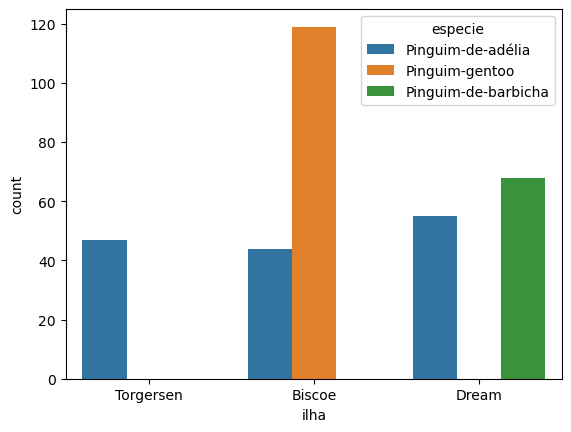

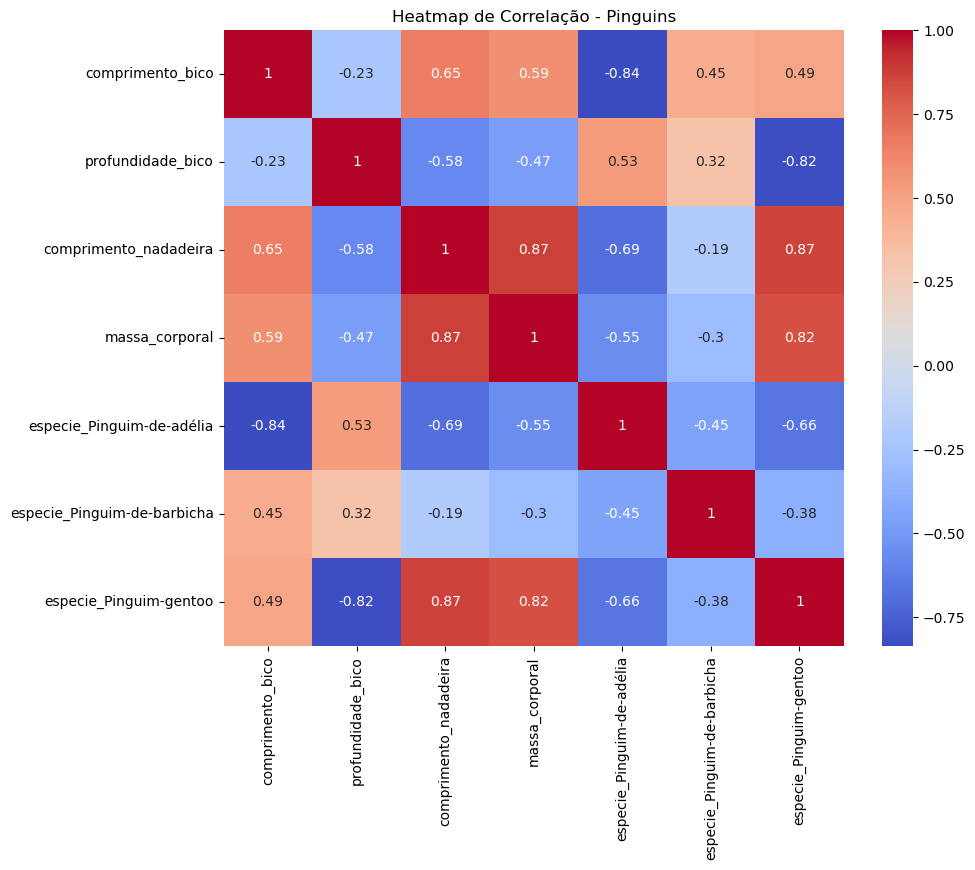

In [27]:
# Plotar o heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação - Pinguins')
plt.show()

Com base no gráfico podemos concluir que:
- As maiores correlações positivas são das variavel *'massa_corporal'* e *'especie_Pinguim-gentoo'*
- A maior correlação negativa é da variavel *'especie_Pinguim-de-aldelia'*
- As variaveis *'comprimento_bico'* e *'profundidade_bico'* possuem uma correlação positiva moderada

Primeiramente testaremos nosso modelo com o máximo de variaveis possiveis e vamos ajustando ao longo do desenvolvimento da análise

Dando uma ultima visualizada em como está nosso dataframe antes de prosseguir

In [28]:
dados_encoded

,comprimento_bico,profundidade_bico,comprimento_nadadeira,massa_corporal,especie_Pinguim-de-adélia,especie_Pinguim-de-barbicha,especie_Pinguim-gentoo
1,39.1,18.7,181.0,3.750,1,0,0
2,39.5,17.4,186.0,3.800,1,0,0
3,40.3,18.0,195.0,3.250,1,0,0
5,36.7,19.3,193.0,3.450,1,0,0
6,39.3,20.6,190.0,3.650,1,0,0
...,...,...,...,...,...,...,...
340,55.8,19.8,207.0,4.000,0,1,0
341,43.5,18.1,202.0,3.400,0,1,0
342,49.6,18.2,193.0,3.775,0,1,0
343,50.8,19.0,210.0,4.100,0,1,0


Agora que foram criadas as variaveis dummy, os dados foram tratados e as correlações foram analisadas podemos partir para a preparação do modelo de Regressão Linear.

# 3 - Divisão dos dados em conjuntos de Treino e Teste

Usaremos uma proporção de 70:30 sendo, 70% para treino e 30% para teste

Criaremos dois conjunto de dados separados, um apenas com a variavel resposta, e outro com as demais.

In [29]:
y1 = dados_encoded['comprimento_nadadeira']

x1 = dados_encoded.drop(['comprimento_nadadeira'], axis=1)

Agora adicionaremos uma constante ao df x1, que equivale ao intercepto.

In [30]:
x1 = sm.add_constant(x1)

Agora dividindo os dados de treino e teste

In [31]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)

- No metodo acima dividimos os dados usando o random_state = 42.  
- Como na computação não existe aleatoriedade verdeira usamos um "coeficiente" para que caso outro o mesmo coeficiente seja usado por outra pessoa, isso garantirá que ela treine o modelo com os mesmos dados.  
- **Curiosidade:** O numero 42 é usado como convenção na linguagem python como referencia ao livro "O guia do Mochileiro das Galáxias" em que 42 é a resposta para a questão fundamental da vida, do universo e de tudo mais.

# 4 - Construção do modelo de Regressão Linear

Partindo para o treinamento do modelo

In [32]:
ols_1 = sm.OLS(y_train1, x_train1)
modelo_1 = ols_1.fit()

Instanciamos o modelo com o método OLS (Minimos Quadrados Ordinarios) passando *'y'* como variavel resposta e *'x'* como variaveis preditoras.  
Ajustamos o modelo usando o método *'fit()'*

Agora com o modelo testado vamos analisar os resultados da regressão com o metodo *'summary()'*

In [33]:
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     comprimento_nadadeira   R-squared:                       0.864
Model:                               OLS   Adj. R-squared:                  0.861
Method:                    Least Squares   F-statistic:                     287.7
Date:                   Thu, 02 May 2024   Prob (F-statistic):           4.31e-96
Time:                           22:21:22   Log-Likelihood:                -718.94
No. Observations:                    233   AIC:                             1450.
Df Residuals:                        227   BIC:                             1471.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         107.1189      4.708     22.753      0.000      97.842     116.396
comprimento_bico                0.5090      0.156      3.268      0.001       0.202       0.816
profundidade_bico               0.8413      0.446      1.885      0.061      -0.038       1.721
massa_corporal                  4.9726      1.048      4.747      0.000       2.908       7.037
especie_Pinguim-de-adélia      29.5259      2.030     14.546      0.000      25.526      33.525
especie_Pinguim-de-barbicha    29.4511      2.432     12.109      0.000      24.659      34.244
especie_Pinguim-gentoo         48.1418      1.906     25.254      0.000      44.386      51.898
==============================================================================
Omnibus:                        5.558   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                6.013
Skew:                          -0.235   Prob(JB):                       0.0495
Kurtosis:                       3.631   Cond. No.                     1.68e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Com base nos dados obtidos sobre o modelo podemos concluir que:
- A variavel *'profundidade_bico'* não passa no teste t, portanto iremos retira-la do modelo.
- Existe a indicação de uma possivel multicolinearidade, que devemos tratar

Vamos analisar a multicolinearidade pois caso *'profundidade_bico*' esteja envolvida já removemos a coluna.  
Iremos fazer uma tabela de correlação apenas das variaveis preditoras.

In [34]:
x1_corr = x1.corr(method='pearson')

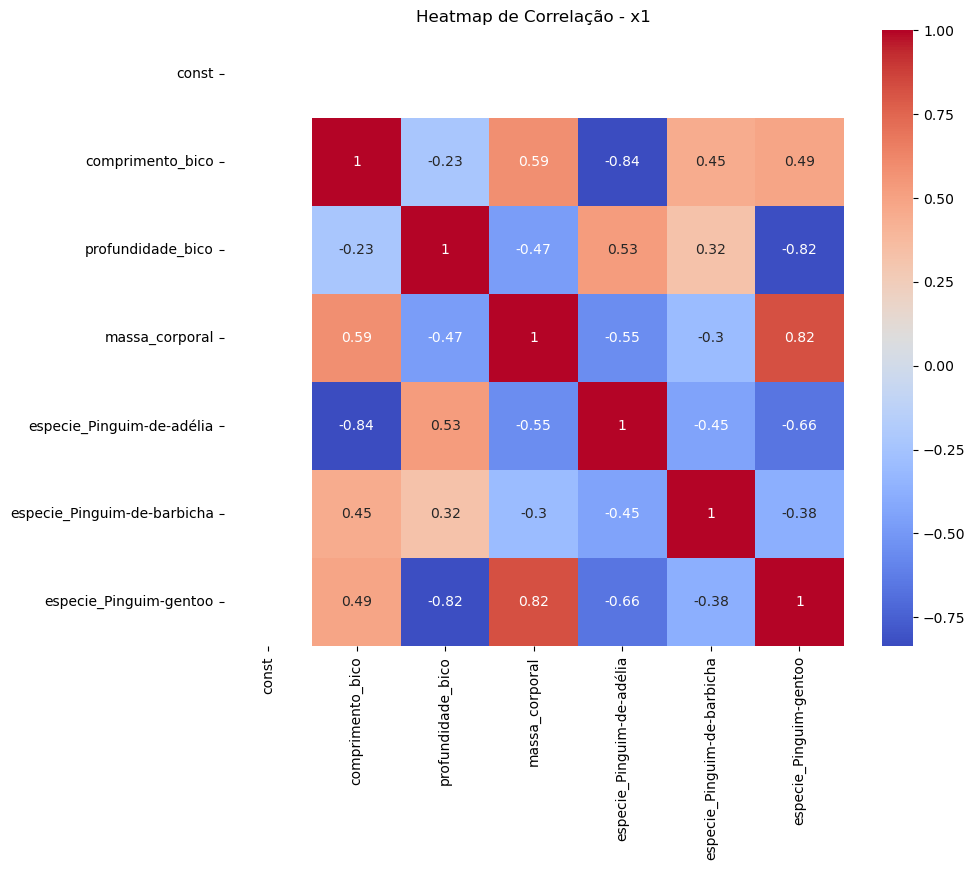

In [35]:
# Plotar o heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(x1_corr, annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação - x1')
plt.show()

De acordo com essa tabela de correlação, iremos retirar as colunas *'especie_Pinguim-de-adélia'*, *'profundidade_bico'*, *'especie_Pinguim-de-barbicha'*

In [36]:
x2 = x1.drop(['especie_Pinguim-de-adélia', 'profundidade_bico', 'especie_Pinguim-de-barbicha'], axis=1)

In [37]:
y2 = dados_encoded['comprimento_nadadeira']

Criamos um novo df de variaveis preditoras e da variavel resposta para treinar um segundo modelo com base nas mudanças realizadas

dividindo novamente os dados em treino e teste

In [38]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)

agora rodaremos o segundo modelo

In [39]:
ols_2 = sm.OLS(y_train2, x_train2)
modelo2 = ols_2.fit()

In [40]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     comprimento_nadadeira   R-squared:                       0.861
Model:                               OLS   Adj. R-squared:                  0.860
Method:                    Least Squares   F-statistic:                     474.3
Date:                   Thu, 02 May 2024   Prob (F-statistic):           6.25e-98
Time:                           22:21:23   Log-Likelihood:                -720.92
No. Observations:                    233   AIC:                             1450.
Df Residuals:                        229   BIC:                             1464.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    146.7657      3.548     41.364      0.000     139.775     153.757
comprimento_bico           0.5365      0.083      6.440      0.000       0.372       0.701
massa_corporal             6.0837      0.833      7.307      0.000       4.443       7.724
especie_Pinguim-gentoo    14.1291      1.281     11.034      0.000      11.606      16.652
==============================================================================
Omnibus:                        5.666   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.928
Skew:                          -0.256   Prob(JB):                       0.0516
Kurtosis:                       3.590   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos observar que:
- A multicolinearidade foi tratada.  
- Todas as variáveis passam no teste t
- O coeficiente R² aumentou e isso foi uma melhoria em relação ao segundo modelo

# 5 - Interpretação dos resultados

Para interpretar nosso modelo corretamente, primeiramente vamos mostrar a sua fórmula

Sabemos que uma regressão multipla tem forma:  
$$ y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + ... + \beta_n \cdot x_n$$

No nosso modelo estamos usando 3 variaveis preditoras, vamos montar a equação que corresponde ao modelo treinado

In [41]:
coeficientes = modelo2.params
nomes_variaveis = coeficientes.index.tolist()[1:] 

Estamos salvando os coeficientes em uma lista, e os nomes das variaveis em outra para criar a fórmula da regressão com o nome dos coeficientes 

In [42]:
# Criando a fórmula de regressão com os nomes dos coeficientes
formula_regressao = 'y = {:.2f}'.format(coeficientes['const'])
for coef, nome_variavel in zip(coeficientes.drop('const'), nomes_variaveis):
    formula_regressao += ' + {:.2f} * {}'.format(coef, nome_variavel)

# Imprimindo a fórmula
print('Fórmula da regressão:', formula_regressao)

Fórmula da regressão: y = 146.77 + 0.54 * comprimento_bico + 6.08 * massa_corporal + 14.13 * especie_Pinguim-gentoo


Nosso modelo tem fórmula:
#### $$y = 146.77 + 0.54 * ComprimentoBico + 6.08 * MassaCorporal + 14.13 * EspecieGentoo$$

Sobre as variáveis e seus coeficientes temos:
 - **Intercepto = 146.77**: Isso significa que quando todas as outras variáveis são zero, o valor previsto para y (comprimento_nadadeira) é de 146.77.
 - **comprimento_bico = 0.54**: O comprimento do bico (mm) é uma variável contínua, portanto, se compararmos dois pinguins que têm as mesmas características, exceto que o bico de um pinguim é 1 milímetro mais longo, esperaríamos que o pinguim com o bico mais longo tivesse uma nadadeira 0.54 mm mais longa do que o pinguim com o bico mais curto.
 - **massa_corporal = 6.08**: A massa corporal (kg) tambem é uma variavel continua, sendo assim, se compararmos dois pinguins que tem a mesma caracteristicas, exceto que um pinguim é 1kg mais pesado que o outro, esperamos que o pinguim mais pesado tenha 6.08 mm a mais de comprimento de nadadeira.
 - **especie_Pinguim-gentoo = 14.13**: Dado o nome desta variável, sabemos que os pinguins de Adélia e de barbicha são o ponto de referência. Portanto, se compararmos um pinguim-de-Adélia e um pinguim-de-barbicha com um pinguim-gentoo, que têm as mesmas características, exceto a espécie, esperaríamos que o pinguim-barbicha e o adélia tivessem uma nadadeira cerca de 14.13 milimetros  menor que o pinguim-gentoo.


# 6 - Predição de valores com o modelo

Agora vamos aplicar nosso modelo para prever os valores com os conjuntos de dados de teste

In [43]:
modelo2.predict(x_test2)

31     187.730025
321    196.431853
80     193.687736
203    215.402253
64     193.455407
          ...    
21     187.730507
8      196.238344
217    214.060487
100    194.886271
36     193.044402
Length: 100, dtype: float64

O método *'predict()'* nos retornou os valores preditos de y para cada x dos dados de testes.  
Agora vamos juntar os valores reaisb com os preditos para podermos analisar os resultados

In [49]:

resultados = pd.DataFrame({'Valor Real': y_test2, 'Valor Predito': modelo2.predict(x_test2)})
print(resultados.head(10))  # Display the first 10 rows

     Valor Real  Valor Predito
31        178.0     187.730025
321       196.0     196.431853
80        195.0     193.687736
203       210.0     215.402253
64        192.0     193.455407
308       201.0     202.004661
293       197.0     193.828557
188       220.0     219.714013
220       229.0     222.737658
205       210.0     211.859817


Criamos o DataFrame resultado o qual contem a coluna com os valores de y originais e os valores de y preditos pelo modelo

# 7 - Avaliação do modelo

Para avaliar nosso modelo usaremos métricas como R-quadrado (que ja foi calculada no método 'summary()'), o erro quadratico medio (MSE) e o erro absoluto medio (MAE). Alem da análise de p-valor

O p-valor e o R² nós analisamos com base na saída do 'summary()':
- R² = 0.851 é um valor bom e proximo de 1
- p-valor: analisando a coluna P>|t| vemos que nenhuma das variaveis tem um p valor maior que 0.05, isso nos faz rejeitar a hipótese nula.

Quanto ao MAE e o MSE calcularemos através de metodos prontos importados

In [53]:
mae = mean_absolute_error(y_test2, resultados['Valor Predito'])
mse = mean_squared_error(y_test2, resultados['Valor Predito'])
rmse = mean_squared_error(y_test2, resultados['Valor Predito'], squared=False)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 3.8106890100736286
Mean Squared Error: 25.191439796866078
Root Mean Squared Error: 5.019107470145073


Idealmente, desejamos que o MAE seja baixo tanto nos dados de treinamento quanto nos dados de teste, indicando que o modelo é capaz de fazer previsões precisas em ambos.

- Se o MAE é muito baixo nos dados de treinamento, mas significativamente mais alto nos dados de teste, é um sinal de overfitting.
- Se o MAE é alto em ambos os conjuntos de dados (treinamento e teste), indica que o modelo é muito simples (underfitting) ou há um problema com a modelagem.

Com base nos calculos efetuados podemos dizer que nosso modelo mantem uma boa margem de erros e está validado

Calculando residuos

In [54]:
residuos = y_test2 - resultados['Valor Predito']
residuos

31     -9.730025
321    -0.431853
80      1.312264
203    -5.402253
64     -1.455407
         ...    
21    -13.730507
8      -1.238344
217     4.939513
100    -2.886271
36      2.955598
Length: 100, dtype: float64

Agora com os residuos calculados podemos plotar alguns graficos para fazer uma analise do mesmo

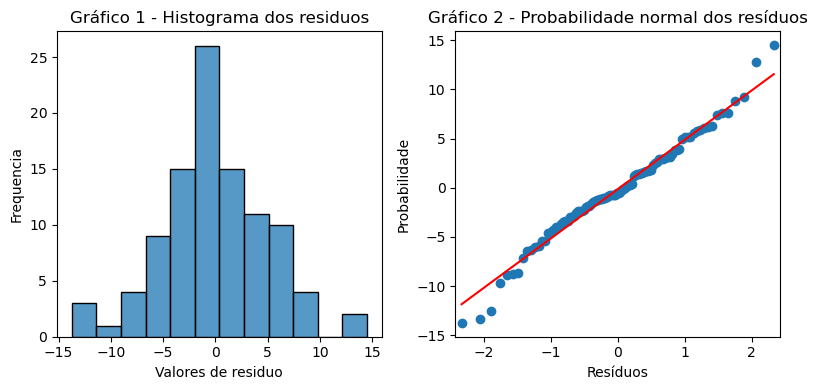

In [62]:
#criando 2 subplotS 
fig, axes = plt.subplots(1, 2, figsize = (8,4))

#subplot1, histograma dos residuos
sns.histplot(residuos, ax=axes[0])
axes[0].set_xlabel("Valores de residuo")
axes[0].set_ylabel("Frequencia")
axes[0].set_title("Gráfico 1 - Histograma dos residuos")

#subplot2, probabilidade normal dos residuos
sm.qqplot(residuos, line='s',ax = axes[1])
axes[1].set_title("Gráfico 2 - Probabilidade normal dos resíduos")
axes[1].set_xlabel("Resíduos")
axes[1].set_ylabel("Probabilidade")


plt.tight_layout()
plt.show()

No gráfico 1 vemos o histograma dos residuos e no 2 temos a normalidade dos residuos.  
Com base nos gráficos acima e nos conceitos vistos em sala, podemos afirmar que:
- Com base em ambos os gráficos, podemos concluir que os resíduos do modelo de regressão estão aproximadamente distribuídos normalmente. Isso indica que o modelo de regressão atende a uma das premissas básicas da regressão linear.
- A ligeira assimetria à direita no gráfico 1 sugere que os resíduos podem não estar perfeitamente distribuídos normalmente.
- Os desvios leves nas extremidades do gráfico 2 também sugerem que alguns resíduos podem estar se desviando da normalidade.
- Se a assimetria no gráfico 1 e os desvios nas extremidades do gráfico 2 forem considerados significativos, pode ser necessário realizar transformações nos dados ou utilizar métodos de regressão robustos.

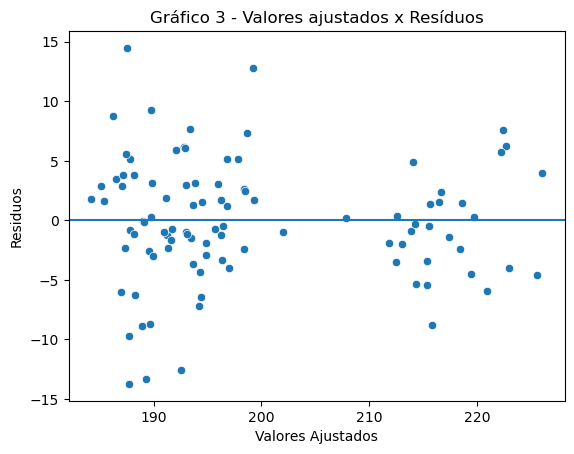

In [63]:
fig = sns.scatterplot(x=resultados['Valor Predito'], y=residuos)

# linha de referencia onde residuos = 0
fig.axhline(0)

fig.set_title("Gráfico 3 - Valores ajustados x Resíduos")
fig.set_xlabel("Valores Ajustados")
fig.set_ylabel("Residuos")

plt.show()

Nesse gráfico avaliamos a qualidade do modelo de regressão ajustado aos dados.  Explicando cada eixo temos:
- Valores ajustados: São os valoers previstos pelo modelo para cada ponto.
- Residuos: As diferenças entre os valores observados dos dados e os valores previstos pelo modelo.  

Com base nas informações do gráfico podemos concluir que:
- Os pontos estão distribuídos aleatoriamente em torno da linha horizontal de resíduo zero, o que indica que não há relação linear significativa entre os resíduos e os valores ajustados.
- A ausência de uma relação linear significativa entre os resíduos e os valores ajustados significa que o modelo de regressão está bem ajustado aos dados. Isso significa que o modelo explica satisfatoriamente a variabilidade dos dados observados.
- O gráfico de dispersão também mostra a presença de alguns pontos que se desviam significativamente da linha horizontal de resíduo zero. Esses pontos podem ser considerados outliers, ou seja, pontos que não se ajustam ao modelo de regressão. 
- A presença de alguns outliers pode indicar que o modelo de regressão não é adequado para todos os dados.

## 8 - Conclusão

Os gráficos juntamente com outros fatores analisados como por exemplo, coeficiente de determinação (R²), erro quadratico medio (MSE), erro absoluto medio (MAE) e o teste t, indicam que o modelo de regressão está bem ajustado aos dados. No entanto, a presença de alguns outliers pode indicar que o modelo de regressão não é adequado para todos os dados.

Recomendações

É recomendável realizar uma análise mais aprofundada dos outliers para determinar se eles influenciam significativamente o modelo de regressão. Se os outliers forem considerados significativos, pode ser necessário modificar o modelo de regressão ou excluir os outliers da análise.
